# Linear regression & evalution modeling techniques - Bikesharing dataset

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
import os

import sklearn


In [2]:
df=pd.read_csv("hour.csv")
df.shape


(17379, 17)

In [3]:
df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


Next, we need to check what datatypes the pandas has inferred & if any of the features require data conversions.

In [4]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [5]:
#date time conversion
df['dteday']=pd.to_datetime(df.dteday)

# Categorical variables
df['season']=df.season.astype('category')
df['holiday']=df.holiday.astype('category')
df['workingday']=df.workingday.astype('category')
df['weekday']=df.weekday.astype('category')
df['weathersit']=df.weathersit.astype('category')
df['mnth']=df.mnth.astype('category')
df['yr']=df.yr.astype('category')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [7]:
#Descriptive statistics for each column
np.round(df.describe(),2)

,instant,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00
mean,8690.00,11.55,0.50,0.48,0.63,0.19,35.68,153.79,189.46
std,5017.03,6.91,0.19,0.17,0.19,0.12,49.31,151.36,181.39
min,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,1.00
25%,4345.50,6.00,0.34,0.33,0.48,0.10,4.00,34.00,40.00
50%,8690.00,12.00,0.50,0.48,0.63,0.19,17.00,115.00,142.00
75%,13034.50,18.00,0.66,0.62,0.78,0.25,48.00,220.00,281.00
max,17379.00,23.00,1.00,1.00,1.00,0.85,367.00,886.00,977.00


## **Modeling**

Split the dataset into training (70%) & testing(30%) sets to evaluate the performance of models

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,0:-3],df.iloc[:,-1],
                                  test_size=0.3, random_state=42)
#Reset train index values
X_train.reset_index(inplace=True)
y_train=y_train.reset_index()
# Reset train index values
X_test.reset_index(inplace=True)
y_test=y_test.reset_index()


In [9]:
train_attributes=X_train[['season','mnth','yr','weekday','holiday','workingday','weathersit',
                         'hum','temp','windspeed']]
test_attributes=X_test[['season','mnth','yr','weekday','holiday','workingday',
                       'hum','temp','windspeed','weathersit']]
cat_attributes=['season','holiday','workingday','weathersit','yr']
num_attributes=['temp','windspeed','hum','mnth','weekday']

In [10]:
#Transform categorical Variables
Bike_train=pd.get_dummies(train_attributes,columns=cat_attributes)
print('Shape of transfomed dataframe::',Bike_train.shape)
Bike_train.head(5)


Shape of transfomed dataframe:: (12165, 19)


,mnth,weekday,hum,temp,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4,yr_0,yr_1
0,4,3,0.42,0.50,0.1940,0,1,0,0,1,0,0,1,0,1,0,0,0,1
1,9,1,0.79,0.68,0.1642,0,0,0,1,1,0,0,1,0,1,0,0,1,0
2,4,3,0.36,0.34,0.4179,0,1,0,0,1,0,0,1,1,0,0,0,0,1
3,6,0,0.34,0.70,0.0000,0,1,0,0,1,0,1,0,1,0,0,0,0,1
4,10,3,0.52,0.56,0.2985,0,0,0,1,1,0,0,1,1,0,0,0,0,1


**Final training dataset for building models**

In [11]:
X=Bike_train
y=y_train.cnt.values

**Linear Regression model**

In [12]:
from sklearn import linear_model
lin_reg=linear_model.LinearRegression()
lr_model=lin_reg.fit(X,y)
print('R-squared score for training dataset::',np.round(lr_model.score(X,y),3))
print('Model coefficients::',np.round(lr_model.coef_,3))
print('Model intercept value::',np.round(lr_model.intercept_,3))



R-squared score for training dataset:: 0.329
Model coefficients:: [   0.636    1.184 -270.172  431.038   40.008   -6.441   -2.869  -42.094
   51.404   14.573  -14.573   -1.16     1.16   -31.356  -19.471  -34.239
   85.067  -39.306   39.306]
Model intercept value:: 145.562


**k-fold cross validation**


In [13]:
# 3 fold cross validation (cv=3)
from sklearn.model_selection import cross_val_predict,cross_val_score
predicted=cross_val_predict(lr_model,X,y,cv=3)

Scatter plot to analyze our predictions

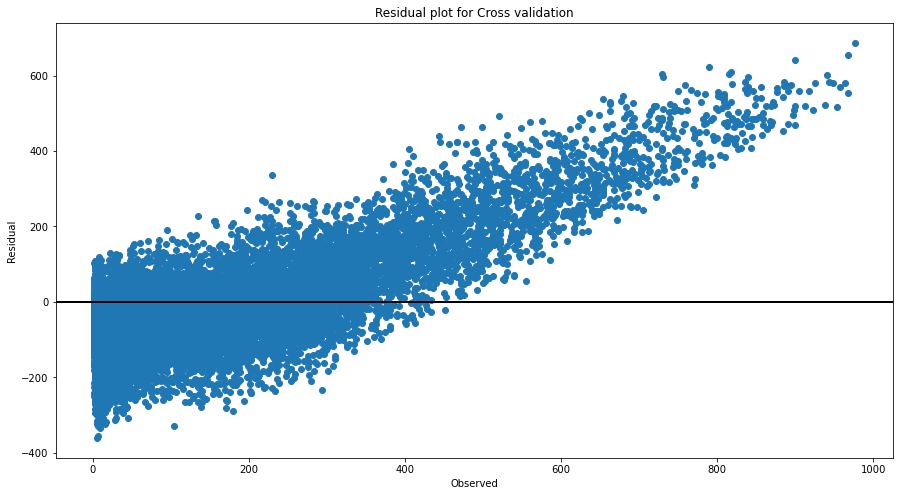

In [14]:
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y,y-predicted)
ax.axhline(lw=2,color='black')
ax.set_title('Residual plot for Cross validation')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

**R-squared score or Coefficient of determination to measure model performance for cross validation**

In [15]:
#R-squared
r2_score=cross_val_score(lr_model,X,y,cv=3)
R2_score=np.average(r2_score)
print('R-squared Score for cross validation dataset::',np.round(R2_score,2))

R-squared Score for cross validation dataset:: 0.33


The R-squared score is 0.80,  which means the predictor is only able to explain 80% of the variance in the target variable. 

**Model Testing**

Let's test our model on un-seen dataset ( testing dataset)

In [16]:
# Tranform categorical data to numerical data for tesing dataset
Bike_test=pd.get_dummies(test_attributes,columns=cat_attributes)
print('Shape of transformed dataframe::',Bike_test.shape)
Bike_test.head(5)


Shape of transformed dataframe:: (5214, 19)


,mnth,weekday,hum,temp,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4,yr_0,yr_1
0,6,6,0.27,0.80,0.1940,0,0,1,0,1,0,1,0,1,0,0,0,0,1
1,1,1,0.41,0.24,0.2239,1,0,0,0,0,1,1,0,1,0,0,0,0,1
2,10,5,0.66,0.32,0.2836,0,0,0,1,1,0,0,1,1,0,0,0,1,0
3,5,2,0.52,0.78,0.3582,0,1,0,0,1,0,0,1,1,0,0,0,0,1
4,1,4,0.56,0.26,0.3881,1,0,0,0,1,0,0,1,1,0,0,0,1,0


Now, will predict our model performance for testing dataset

In [17]:
from sklearn.metrics import r2_score
# Test dataset for model testing
X_t=Bike_test
y_t=y_test.cnt.values
#predict the model performance
y_pred=lr_model.predict(X_t)
residuals=y_t-y_pred
#predicted score
print('R-squared score for testing dataset::',np.round(r2_score(y_t,y_pred),3))


R-squared score for testing dataset:: 0.321


Residual plot for testing dataset


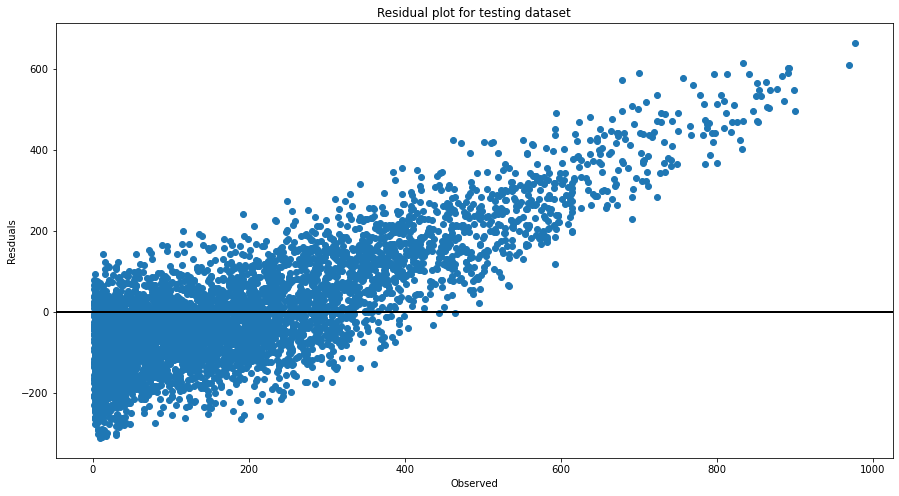

In [18]:
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_t, residuals)
ax.axhline(lw=2,color='black')
ax.set_title('Residual plot for testing dataset')
ax.set_xlabel('Observed')
ax.set_ylabel('Resduals')
plt.show()

Although the linear regression model is performing equally on both training & testing datasets, the model is unable to model the data to generate decent results due to non-linearty & other factors.

**Decision tree based Regression**

Train dataset for Decision tress based regression

In [19]:
X_d=Bike_train
y_d=y_train.cnt.values
X_d.shape,y_d.shape

((12165, 19), (12165,))

In [20]:
#Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=5,min_samples_split=8,max_leaf_nodes=40,min_samples_leaf=3)
dtr.fit(X_d,y_d)


DecisionTreeRegressor(max_depth=5, max_leaf_nodes=40, min_samples_leaf=3,
                      min_samples_split=8)

In [21]:
print('R-squared score::',np.round(dtr.score(X_d,y_d),2))

R-squared score:: 0.36


###  Model performance on test dataset

In [27]:
from sklearn.metrics import r2_score
# Test dataset for model testing
X_dt=Bike_test
y_dt=y_test.cnt.values
#predict the model performance
y_dpred=dtr.predict(X_dt)
residuals=y_dt-y_dpred
#predicted score
print('R-squared score for testing dataset::',np.round(r2_score(y_dt,y_dpred),3))

R-squared score for testing dataset:: 0.327


### Residual plot for test data

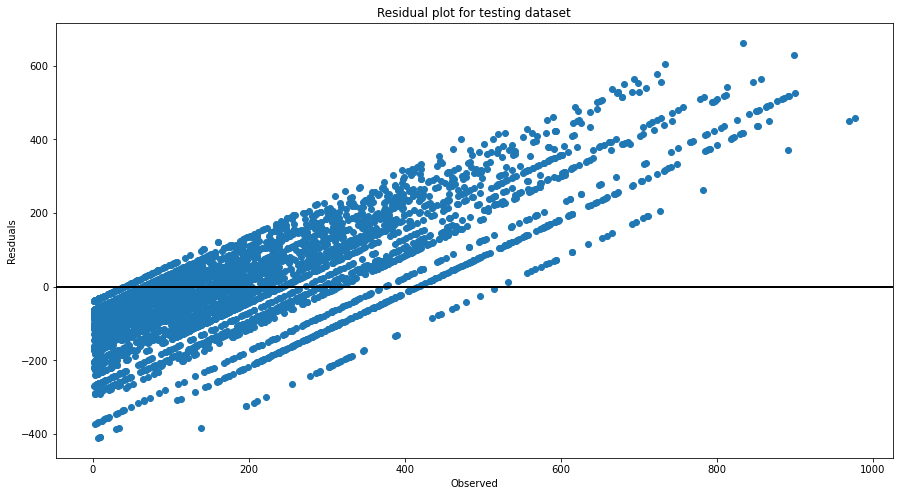

In [28]:
residuals=y_dt-y_dpred
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_dt, residuals)
ax.axhline(lw=2,color='black')
ax.set_title('Residual plot for testing dataset')
ax.set_xlabel('Observed')
ax.set_ylabel('Resduals')
plt.show()

From the R-squared score, it is evedent that,the Decision tree based regression model permance is comparable with linear regression model.

### **Random Forest based Regression**

 Train & Test Datasets for Random Forest based regression

In [29]:
# Train dataset
X_rf_tr=Bike_train
y_rf_tr=y_train.cnt.values
X_rf_tr.shape,y_rf_tr.shape

((12165, 19), (12165,))

In [30]:
#Test dataset
X_rf_ts=Bike_test
y_rf_ts=y_test.cnt.values
X_rf_ts.shape,y_rf_ts.shape

((5214, 19), (5214,))

In [34]:
# import the model
from sklearn.ensemble import RandomForestRegressor
# Assign no. of decision trees = 1000
rf=RandomForestRegressor(n_estimators=1000, random_state=42)
# Train the model on the training data
rf.fit(X_rf_tr,y_rf_tr)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [35]:
# R-squared score for trained data
print('R-squared score for trained dataset::',np.round(rf.score(X_rf_tr,y_rf_tr),3))

R-squared score for trained dataset:: 0.91


### Making predictions on the test dataset


In [36]:
#Use the forest's predict method
y_pred_rf=rf.predict(X_rf_ts)

# R-squared score for predictions
print('R-squared score for predictions::',np.round(r2_score(y_rf_ts,y_pred_rf),3))

R-squared score for predictions:: 0.439


### **Model Evaluation**

Evaluating the models to select best model for prediction

In [37]:
#Dataframe for models
Model = ['Linear Regression','Decision tree','Random Forest']
df1=pd.DataFrame(Model,columns=['Model'])
R2_score = [0.846,0.84,0.897]
df2=pd.DataFrame(R2_score,columns=['R2_score'])
Model_df=pd.merge(df1,df2,left_index=True,right_index=True)
print('Model evaluation on test data:\n',Model_df)

Model evaluation on test data:
                Model  R2_score
0  Linear Regression     0.846
1      Decision tree     0.840
2      Random Forest     0.897


### From the R2_score, it is concluded that Decision tree based regression has higest score among all models. Hence, the Random Forest based Regression is best for predicting the Bike sharing demand.